# 1. Extração de contorno paramétrico

Faremos a extração do contorno de um objeto de forma que os pixels obtidos estejam ordenados. Isto é, se imaginarmos que estamos caminhando sobre a borda do objeto, os pixels da borda são visitados em sequência. Um array contendo os pixels visitados durante a caminhada representa o contorno paramétrico. Note que podemos realizar a caminhada no sentido horário ou antihorário. No algoritmo abaixo consideraremos o sentido horário. 

Para um dado pixel de borda corrente, precisamos procurar pelo próximo pixel. Isso é feito visitando os pixels vizinhos do pixel corrente, até que um pixel de valor 1 (representando o objeto) seja encontrado.

Note que no algoritmo abaixo, a vizinhança de cada pixel P é enumerada da seguinte forma:

<img src="https://i.imgur.com/C2eZRvW.png" alt="Imagem não pode ser carregada. Você está conectado com a internet?" width="150"/>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_contour(img):
    '''Obtém o contorno paramétrico de um objeto contido
       no array img.'''
    
    # Mapeamento utilizado para encontrar o vizinho inicial a ser
    # buscado na próxima iteração dado o vizinho do ponto atual
    # Por exemplo, se o ponto atual for (12, 15) e o próximo ponto
    # de borda for (12, 16), isso significa que o vizinho de índice
    # 2 será o próximo ponto de borda. Nesse novo ponto, precisamos
    # buscar a partir do vizinho de índice 1, pois o vizinho de
    # índice 0 foi o último ponto a ser verificado antes de encontrarmos
    # o ponto atual
    neighbor_map = [7, 7, 1, 1, 3, 3, 5, 5]
    
    # Adiciona 0 ao redor da imagem para evitar pontos 
    # do objeto tocando a borda
    img_pad = np.pad(img, 1, mode='constant')
    
    num_rows, num_cols = img_pad.shape
    k = 0
    row = 0
    col = 0
    # Busca do primeiro ponto do objeto
    while img_pad[row, col]==0:
        k += 1
        row = k//num_cols
        col = k - row*num_cols
        
    curr_point = (row, col)    # Ponto atual
    contour = [curr_point]     # Pontos do contorno
    starting_index = 2         # Índice do vizinho inicial a ser verificado
    while True:
        next_point, last_index = get_next_point(img_pad, curr_point, 
                                                    starting_index)

        # Novo índice do vizinho inicial baseado no último
        # índice buscado
        starting_index = neighbor_map[last_index]
        
        # Critério de parada. Se o ponto adicionado na iteração anterior (contour[-1])
        # for o mesmo que o primeiro ponto (contour[0]) e o ponto atual for o mesmo
        # que o segundo ponto adicionado, o algoritmo termina. Só podemos fazer essa
        # verificação se o contorno possuir ao menos 2 pontos. Ou seja, nosso algoritmo
        # não está tratando o caso de um objeto com apenas 1 pixel
        if len(contour)>1:
            if next_point==contour[1] and contour[-1]==contour[0]:
                break
                
        contour.append(next_point)
        curr_point = next_point
        
    # Subtrai 1 de cada ponto pois o contorno foi encontrado para a
    # imagem preenchida com 0 na borda
    for point_index, point in enumerate(contour):
        contour[point_index] = (point[0]-1, point[1]-1)
        
    return contour

def get_next_point(img, curr_point, starting_index):
    '''Encontra o próximo ponto de borda dado um ponto
       corrente curr_point e o índice do primeiro vizinho
       a ser verificado (starting_index)'''
     
    # Lista dos pontos vizinhos dado o índice do vizinho
    nei_list = [(-1,0), (-1,1), (0,1), (1,1), 
                (1,0), (1,-1),(0,-1), (-1,-1)]
    
    curr_index = starting_index
    nei_value = 0
    while nei_value==0:
        nei_shift = nei_list[curr_index]
        nei_row = curr_point[0] + nei_shift[0]
        nei_col = curr_point[1] + nei_shift[1]
        nei_value = img[nei_row, nei_col]
        if nei_value==1:
            return (nei_row, nei_col), curr_index
        else:
            curr_index = (curr_index+1)%8

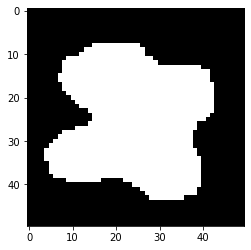

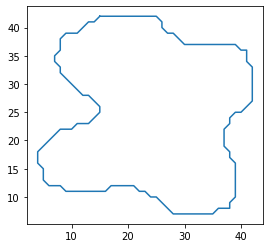

In [2]:
img = plt.imread('blob.tiff')
img = img>0
plt.imshow(img, 'gray')

cont = image_contour(img)
# Transforma o contorno em um array numpy
cont = np.array(cont)

plt.figure()
plt.subplot(111, aspect='equal')
# Plota os pontos de contorno, precisamos inverter os valores em y porque,
# na imagem, a origem está no ponto superior esquerdo
plt.plot(cont[:,1], img.shape[0]-cont[:,0])

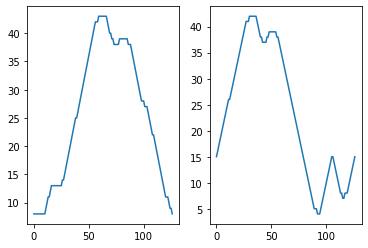

In [3]:
plt.subplot(1, 2, 1)
plt.plot(cont[:,0])
plt.subplot(1, 2, 2)
plt.plot(cont[:,1])